In [1]:
import tensorflow as tf
import numpy as np
import random
import os
from glob import glob
import time, datetime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import numpy as np

In [3]:
np.__version__

'1.19.5'

## Checking our data and Visualizing

### Parsing through our data

In [4]:
data_dir = 'Food-Vision-REDO/datasets/all_data_set/'
test_dir = 'Food-Vision-REDO/datasets/all_data_set/test/'
train_dir = 'Food-Vision-REDO/datasets/all_data_set/test/'

for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Food-Vision-REDO/datasets/all_data_set/'.
There are 10 directories and 0 images in 'Food-Vision-REDO/datasets/all_data_set/test'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\baklava'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\chicken_wings'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\filet_mignon'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\gyoza'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\paella'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\peking_duck'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\sashimi'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\scallops'.
There are 0 directories and 250 images i

### Generating a list of classes

In [5]:
class_list = glob(os.path.join(test_dir, '*',))
class_list = [i.split('\\')[-1] for i in class_list]
class_list

['baklava',
 'chicken_wings',
 'filet_mignon',
 'gyoza',
 'paella',
 'peking_duck',
 'sashimi',
 'scallops',
 'spring_rolls',
 'tuna_tartare']

### Visualizing Random Images

In [76]:
def plot_random_image(class_list, directory):
    
    '''
    Takes in a list of classes which randomly selects an image in its directory
    
    
    Parameters
    --------
    class_list - list of classes(similar to its folder name)
    directory - location of images you would want to view
    '''
    
    random_class = random.choice(class_list)
    random_dir = directory + random_class
    random_img = random.choice(os.listdir(random_dir))
    rng_dir_img = random_dir + '/' + random_img
    arr_dir_img = mpimg.imread(rng_dir_img)
    
    img=plt.imshow(arr_dir_img)
    plt.axis(False)
    plt.title(f'class:{random_class}\n shape:{arr_dir_img.shape}\n {random_img}')
    return img

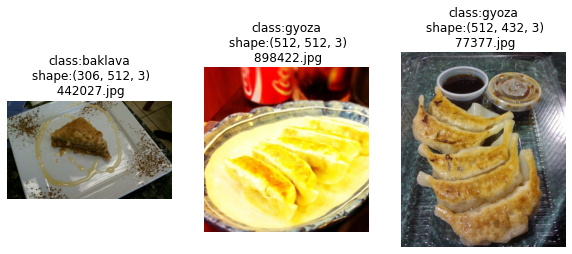

In [77]:
plt.figure(figsize=(10,10))
for i in range(1,4):
    plt.subplot(1,3,i)
    plot_random_image(class_list, test_dir)

## What is a Convolutional Neural Network and how does it work?

## Building a CNN from Scratch

#### Importing data from directory

In [8]:
# importing our data
train_dir = './Food-Vision-REDO/datasets/all_data_set/train/'
test_dir = './Food-Vision-REDO/datasets/all_data_set/test/'

#### Generating a base model

In [60]:
# normalize the rgb values to 0-1
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# creating mini batches of categorical data and reshaping them into 224,224
train_data = train_10_percent_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224) 
)

test_data = test_datagen.flow_from_directory(
    test_dir, 
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224)
)

# building our base model


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compiling
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# fitting and saving its history
model_1_history = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    #callbacks=[]
)

Epoch 1/5
235/235 [==============================] - 19s 72ms/step - loss: 2.1300 - accuracy: 0.2155 - val_loss: 2.0331 - val_accuracy: 0.2884
Epoch 2/5
235/235 [==============================] - 16s 69ms/step - loss: 1.8441 - accuracy: 0.3512 - val_loss: 1.9181 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 16s 67ms/step - loss: 1.4880 - accuracy: 0.5068 - val_loss: 2.0505 - val_accuracy: 0.3164
Epoch 4/5
235/235 [==============================] - 16s 68ms/step - loss: 0.8965 - accuracy: 0.7077 - val_loss: 2.7161 - val_accuracy: 0.2816
Epoch 5/5
235/235 [==============================] - 16s 67ms/step - loss: 0.3659 - accuracy: 0.8884 - val_loss: 3.6433 - val_accuracy: 0.2652


In [11]:
model_1.evaluate(test_data)

79/79 [==============================] - 4s 49ms/step - loss: 3.6433 - accuracy: 0.2652


[3.643315315246582, 0.2651999890804291]

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [13]:
def plot_history_curves(model):
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    
    accuracy = model.history['accuracy']
    val_accuracy = model.history['val_accuracy']
    
    epochs = range(len(model.history['loss']))
    
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

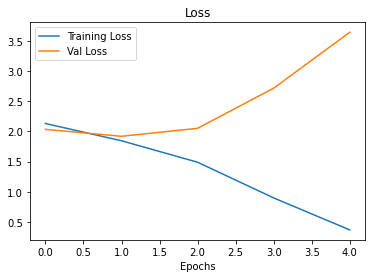

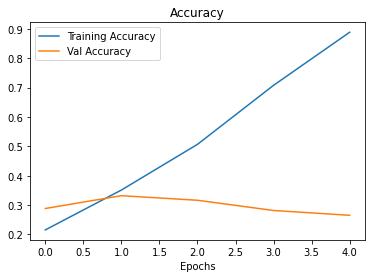

In [14]:
plot_history_curves(model_1_history)

### Overcoming Overfitting

Based from the graph above we can say our model is overfitting

Overfitting generally happens when our model **IS** learning on the training set, but doesn't really perform well with the validation set as seen in the graphs.

How to overcome overfitting: 

* **Get more data** - Get more data, having more data == more patterns to learn from. (we already have a wide variety of images)
* **Simplify model** - Overfitting would simply mean LITERALLY DOING PERFECTLY in the training set that its using those features(MEMORIZED it) instead of learning and actually applying what it's learned in the test/validation
* **Use Data Augmentation** - Generating different patterns of the image so the model would take a hard time learning as it adds different varieties of patterns to learn from. 
* **Use Transfer Learning** - By utilizing models that have already and been pretrained and use those patterns for our own problems

#### Simplifying the data

In [15]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2_history = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 16s 66ms/step - loss: 2.1379 - accuracy: 0.2395 - val_loss: 1.9646 - val_accuracy: 0.2944
Epoch 2/5
235/235 [==============================] - 15s 65ms/step - loss: 1.7610 - accuracy: 0.3967 - val_loss: 1.8680 - val_accuracy: 0.3608
Epoch 3/5
235/235 [==============================] - 16s 67ms/step - loss: 1.4714 - accuracy: 0.5148 - val_loss: 1.9135 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 16s 68ms/step - loss: 1.1297 - accuracy: 0.6285 - val_loss: 2.0709 - val_accuracy: 0.3116
Epoch 5/5
235/235 [==============================] - 16s 67ms/step - loss: 0.7761 - accuracy: 0.7620 - val_loss: 2.5967 - val_accuracy: 0.2940


In [16]:
model_2.evaluate(test_data)

79/79 [==============================] - 4s 49ms/step - loss: 2.5967 - accuracy: 0.2940


[2.5966997146606445, 0.2939999997615814]

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

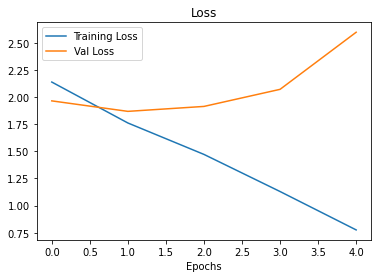

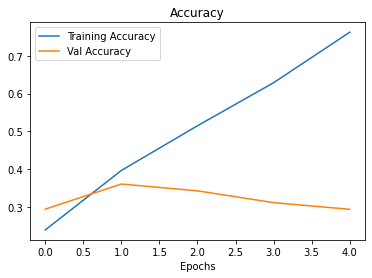

In [18]:
plot_history_curves(model_2_history)

Generally better than our base model, yet our model is still overfitting and not learning any better.

#### Data Augmentation

In [ ]:
### Explain Data Augmentation

In [19]:
train_augmented_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_data_augmentmented = train_augmented_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.


##### Data Augmentation with CPU

In [20]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3_history = model_3.fit(
    train_data_augmentmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmentmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 71s 303ms/step - loss: 2.2202 - accuracy: 0.1957 - val_loss: 2.0447 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 72s 308ms/step - loss: 2.0273 - accuracy: 0.2832 - val_loss: 1.9545 - val_accuracy: 0.3168
Epoch 3/5
235/235 [==============================] - 71s 302ms/step - loss: 1.9511 - accuracy: 0.3127 - val_loss: 1.8733 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 72s 306ms/step - loss: 1.9134 - accuracy: 0.3195 - val_loss: 1.8972 - val_accuracy: 0.3452
Epoch 5/5
235/235 [==============================] - 71s 304ms/step - loss: 1.8548 - accuracy: 0.3464 - val_loss: 1.8555 - val_accuracy: 0.3536


The training now is generally a lot slower this time since we're using our CPU for data augmentation this time, and at the same time training the model.

## Building a CNN with help of Transfer Learning

## Scaling Up our CNN Model